<a href="_index.ipynb">&larr; DFT-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# DFT periodischer Signale mit Python
In diesem Notebook zur gleichnamigen Übungsaufgabe wird gezeigt, wie man das Spektrum periodischer Signale berechnet. Als Beispiel nehmen wir

$$y(t) = 1 + 0,5\sin(2 \pi t \cdot \text{1 kHz}) + 0,2\cos(2 \pi t \cdot \text{1,1 kHz})$$

In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

%matplotlib inline    
import matplotlib.pyplot as plt
import dsp_fpga_lib as dsp # import and set plot properties
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

np.set_printoptions(threshold=20) # for > 20 items, print as (1,2, ... , 99, 100)
import scipy.signal as sig

figsize = {"figsize": (12,5), "facecolor":"w"}

Wir starten mit folgendem Python-Skript:

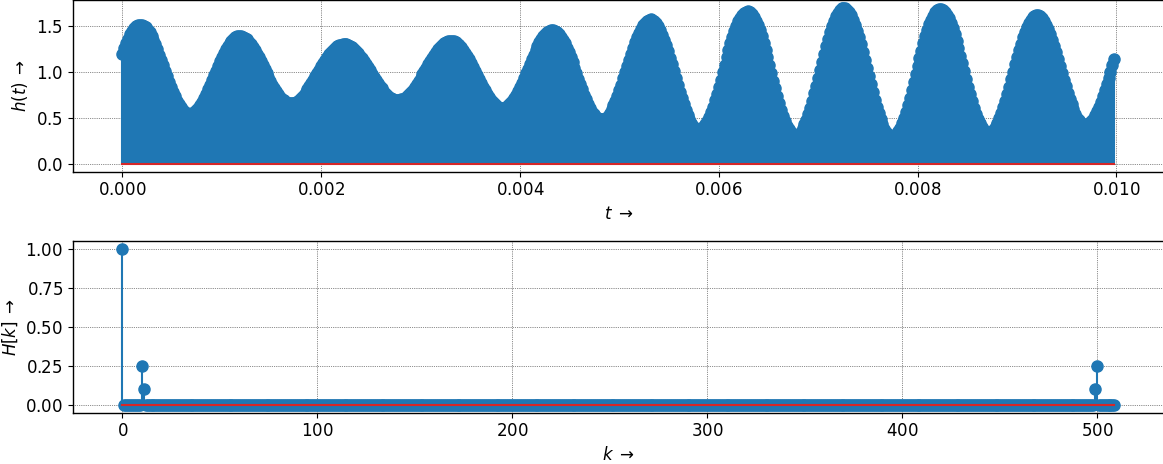

In [4]:
f_S = 51e3; T_S = 1. / f_S
N_FFT = 510; t_max = N_FFT * T_S
f_a = 1e3; f_b = 1.1e3
t = np.arange(0, t_max, T_S)
y = 1 + 0.5* np.sin(2*np.pi*t*f_a) + 0.2 * np.cos(2*np.pi*t*f_b)
Sy = np.fft.fft(y,N_FFT)/N_FFT
f = np.arange(N_FFT)

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, **figsize)
ax1.stem(t, y)
ax1.set_xlabel(r"$t \; \rightarrow$")
ax1.set_ylabel(r"$h(t) \; \rightarrow$")
ax2.stem(f, abs(Sy)) 
ax2.set_xlabel(r"$k \; \rightarrow$")
ax2.set_ylabel(r"$H[k] \; \rightarrow$")

fig1.set_tight_layout(True)

### Aufgaben

- Skalieren Sie die DFT so, dass die Frequenzachse in Hz und die Leistungen/Amplituden im Zeit- und Frequenzbereich identisch sind.

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.